In [22]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt

# Check for TensorFlow GPU access
print(f"TensorFlow has access to the following devices:\n{tf.config.list_physical_devices()}")

# See TensorFlow version: working on tensorflow-macos: 2.9.0, tensorflow-metal: 0.5.0 (https://developer.apple.com/metal/tensorflow-plugin/)
print(f"TensorFlow version: {tf.__version__}") 

from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow_datasets as tfds 

import keras

TensorFlow has access to the following devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow version: 2.9.0


In [2]:
sentences = [
    'Today is a sunny day',
    'Today is a rainy day',
    'Is it sunny today?'
]

tokenizer = Tokenizer(num_words = 100) 
tokenizer.fit_on_texts(sentences) 
word_index = tokenizer.word_index 
print(word_index)

sequences = tokenizer.texts_to_sequences(sentences)
print(sequences)

{'today': 1, 'is': 2, 'a': 3, 'sunny': 4, 'day': 5, 'rainy': 6, 'it': 7}
[[1, 2, 3, 4, 5], [1, 2, 3, 6, 5], [2, 7, 4, 1]]


In [3]:
# seeing how a pretrained network (above) views new sentences with words that weren't tokenized
# below the words 'snowy', 'will', 'be', 'tomorrow' arent in the training set above in 'sentences'
test_data = [
        'Today is a snowy day',
        'Will it be rainy tomorrow?'
]

test_sequences = tokenizer.texts_to_sequences(test_data) 
print(word_index)
print(test_sequences)

{'today': 1, 'is': 2, 'a': 3, 'sunny': 4, 'day': 5, 'rainy': 6, 'it': 7}
[[1, 2, 3, 5], [7, 6]]


It views the above two sentences as 'today is a day' and 'it rainy'. This is why we need out-of-vocabulary tokens.

In [4]:
tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>") # added oov_token
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(sentences)

test_sequences = tokenizer.texts_to_sequences(test_data) 
print(word_index)
print(test_sequences)

{'<OOV>': 1, 'today': 2, 'is': 3, 'a': 4, 'sunny': 5, 'day': 6, 'rainy': 7, 'it': 8}
[[2, 3, 4, 1, 6], [1, 8, 1, 7, 1]]


Now this reads 'today is a <_OOV_> day' and '<_OOV_> it <_OOV_> rainy <_OOV_>'

In [5]:
sentences = [
    'Today is a sunny day',
    'Today is a rainy day',
    'Is it sunny today?',
    'I really enjoyed walking in the snow today'
]

tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>") 
tokenizer.fit_on_texts(sentences) 
word_index = tokenizer.word_index 
print(word_index)

sequences = tokenizer.texts_to_sequences(sentences)
print(sequences)

{'<OOV>': 1, 'today': 2, 'is': 3, 'a': 4, 'sunny': 5, 'day': 6, 'rainy': 7, 'it': 8, 'i': 9, 'really': 10, 'enjoyed': 11, 'walking': 12, 'in': 13, 'the': 14, 'snow': 15}
[[2, 3, 4, 5, 6], [2, 3, 4, 7, 6], [3, 8, 5, 2], [9, 10, 11, 12, 13, 14, 15, 2]]


Similar to images, sentences also need to be of the same length. 

In [6]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# prepadding (default option)
padded = pad_sequences(sequences)
print(padded)

[[ 0  0  0  2  3  4  5  6]
 [ 0  0  0  2  3  4  7  6]
 [ 0  0  0  0  3  8  5  2]
 [ 9 10 11 12 13 14 15  2]]


In [7]:
# post paddding
padded = pad_sequences(sequences, padding='post')
print(padded)

[[ 2  3  4  5  6  0  0  0]
 [ 2  3  4  7  6  0  0  0]
 [ 3  8  5  2  0  0  0  0]
 [ 9 10 11 12 13 14 15  2]]


In [8]:
# setting a max length
padded = pad_sequences(sequences, padding='post', maxlen=6) 
print(padded)

[[ 2  3  4  5  6  0]
 [ 2  3  4  7  6  0]
 [ 3  8  5  2  0  0]
 [11 12 13 14 15  2]]


In [9]:
# truncating settings
padded = pad_sequences(sequences, padding='post', maxlen=6, truncating='post')
print(padded)

[[ 2  3  4  5  6  0]
 [ 2  3  4  7  6  0]
 [ 3  8  5  2  0  0]
 [ 9 10 11 12 13 14]]


In [10]:
from bs4 import BeautifulSoup 

sentence = 'Today is a sunny day'

soup = BeautifulSoup(sentence) 
sentence = soup.get_text()

In [11]:
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

In [12]:
words = sentence.split() 
# sentences = []
filtered_sentence = "" 
for word in words:
    if word not in stopwords:
        filtered_sentence = filtered_sentence + word + " "
sentences.append(filtered_sentence)

In [13]:
print(sentences)

['Today is a sunny day', 'Today is a rainy day', 'Is it sunny today?', 'I really enjoyed walking in the snow today', 'Today sunny day ']


In [14]:
imdb_sentences = []
train_data = tfds.as_numpy(tfds.load('imdb_reviews', split="train")) 
for item in train_data:
    imdb_sentences.append(str(item['text']))

Metal device set to: Apple M1


2023-02-07 20:24:58.287193: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-07 20:24:58.287692: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-02-07 20:24:58.343276: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [15]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=5000)
tokenizer.fit_on_texts(imdb_sentences)
sequences = tokenizer.texts_to_sequences(imdb_sentences)

In [16]:
# print(tokenizer.word_index)

In [17]:
from bs4 import BeautifulSoup 
import string

stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

table = str.maketrans('', '', string.punctuation)

imdb_sentences = []

train_data = tfds.as_numpy(tfds.load('imdb_reviews', split="train")) 
for item in train_data:
    sentence = str(item['text'].decode('UTF-8').lower())
    soup = BeautifulSoup(sentence)
    sentence = soup.get_text()
    sentence = sentence.replace(",", " , ")
    sentence = sentence.replace(".", " . ")
    sentence = sentence.replace("-", " - ")
    sentence = sentence.replace("/", " / ")
    words = sentence.split()
    filtered_sentence = "" 
    for word in words:
        word = word.translate(table) 
        if word not in stopwords:
            filtered_sentence = filtered_sentence + word + " "
    imdb_sentences.append(filtered_sentence)
    
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=25000) 
tokenizer.fit_on_texts(imdb_sentences)
sequences = tokenizer.texts_to_sequences(imdb_sentences)
# print(tokenizer.word_index)

/Users/ammaarkhan/Desktop/Ammaar/tensorflow-test/env/lib/python3.10/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [18]:
# !jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10 # - had to run this to run below command

In [19]:
print(imdb_sentences)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [20]:
(train_data, test_data), info = tfds.load(
        'imdb_reviews/subwords8k',
        split = (tfds.Split.TRAIN, tfds.Split.TEST),
        as_supervised=True,
        with_info=True
)

In [21]:
encoder = info.features['text'].encoder
print ('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8185


In [22]:
print(encoder.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [23]:
sample_string = 'Today is a sunny day'
encoded_string = encoder.encode(sample_string)
print ('Encoded string is {}'.format(encoded_string))

Encoded string is [6427, 4869, 9, 4, 2365, 1361, 606]


In [24]:
print(encoder.subwords[605])

day


In [25]:
encoded_string = encoder.encode(sample_string)
original_string = encoder.decode(encoded_string)
test_string = encoder.decode([6427, 4869, 9, 4, 2365, 1361, 606])
print(test_string)

Today is a sunny day


### Loading Text from CSV Files

In [26]:
import csv
# sentences=[]
# labels=[]
# with open('Twitter_Data.csv', encoding='UTF-8') as csvfile:
#     reader = csv.reader(csvfile, delimiter=",") 
#     for row in reader:
#         labels.append(int(row[0]))
#         sentence = row[1].lower()
#         sentence = sentence.replace(",", " , ")
#         sentence = sentence.replace(".", " . ")
#         sentence = sentence.replace("-", " - ")
#         sentence = sentence.replace("/", " / ")
#         soup = BeautifulSoup(sentence)
#         sentence = soup.get_text()
#         words = sentence.split()
#         filtered_sentence = ""
#         for word in words:
#             word = word.translate(table) 
#             if word not in stopwords:
#                     filtered_sentence = filtered_sentence + word + " "
#                     sentences.append(filtered_sentence)

In [28]:
import json
data = []
for line in open('Sarcasm_Dataset_v2.json', 'r'):
    data.append(json.loads(line))

In [29]:
# data = list(parse_data('Sarcasm_Dataset_v2.json'))

In [30]:
data

[{'is_sarcastic': 1,
  'headline': 'thirtysomething scientists unveil doomsday clock of hair loss',
  'article_link': 'https://www.theonion.com/thirtysomething-scientists-unveil-doomsday-clock-of-hai-1819586205'},
 {'is_sarcastic': 0,
  'headline': 'dem rep. totally nails why congress is falling short on gender, racial equality',
  'article_link': 'https://www.huffingtonpost.com/entry/donna-edwards-inequality_us_57455f7fe4b055bb1170b207'},
 {'is_sarcastic': 0,
  'headline': 'eat your veggies: 9 deliciously different recipes',
  'article_link': 'https://www.huffingtonpost.com/entry/eat-your-veggies-9-delici_b_8899742.html'},
 {'is_sarcastic': 1,
  'headline': 'inclement weather prevents liar from getting to work',
  'article_link': 'https://local.theonion.com/inclement-weather-prevents-liar-from-getting-to-work-1819576031'},
 {'is_sarcastic': 1,
  'headline': "mother comes pretty close to using word 'streaming' correctly",
  'article_link': 'https://www.theonion.com/mother-comes-pretty-

In [31]:
sentences = []
labels = []
links = []

for item in data:
    sentence = item['headline'].lower()
    sentence = sentence.replace(",", " , ")
    sentence = sentence.replace(".", " . ")
    sentence = sentence.replace("-", " - ")
    sentence = sentence.replace("/", " / ")
    soup = BeautifulSoup(sentence)
    sentence = soup.get_text()
    words = sentence.split()
    filtered_sentence = ""
    for word in words:
        word = word.translate(table)
        if word not in stopwords:
            filtered_sentence = filtered_sentence + word + " "
    sentences.append(filtered_sentence)
    labels.append(item['is_sarcastic'])
    links.append(item['article_link'])

In [32]:
training_size = 25000
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [35]:
vocab_size = 20000
max_length = 10
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"


tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(training_sequences, padding='post')
# print(word_index)
padded

array([[14039,   246,  3193, ...,     0,     0,     0],
       [ 6666,  1624,   614, ...,     0,     0,     0],
       [  909, 10144,   164, ...,     0,     0,     0],
       ...,
       [    8,    89,   165, ...,     0,     0,     0],
       [ 2616,  3008,  1573, ...,     0,     0,     0],
       [   72,   152,    53, ...,     0,     0,     0]], dtype=int32)

## Chapter 9: Sentiment Programming using Embeddings

### Naive Prediction to Create a Baseline

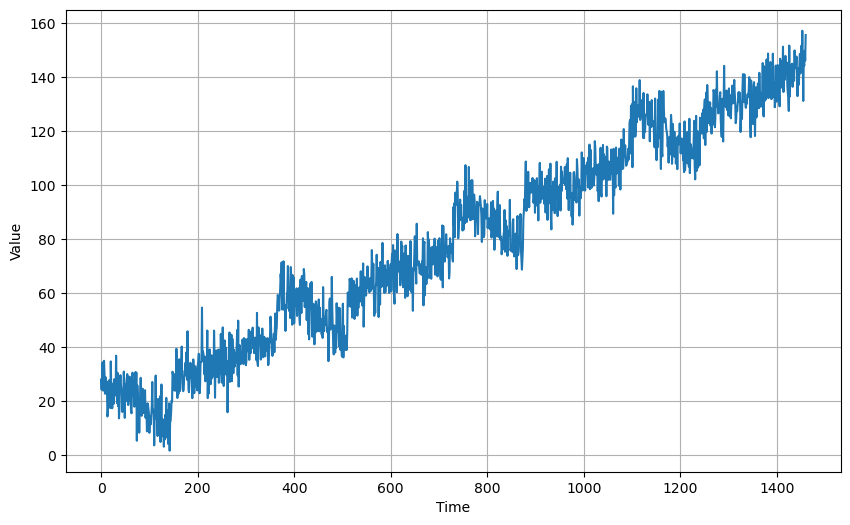

In [24]:
def plot_series(time, series, format="-", start=0, end=None): 
    plt.plot(time[start:end], series[start:end], format) 
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)
    
def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4, np.cos(season_time * 2 * np.pi),1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0): 
    """Repeats the same pattern at each period""" 
    season_time = ((time + phase) % period) / period 
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None): 
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level
    
time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, .05)
baseline = 10
amplitude = 15
slope = 0.09
noise_level = 6

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

### Splitting the set from 1-1000 and 1000+

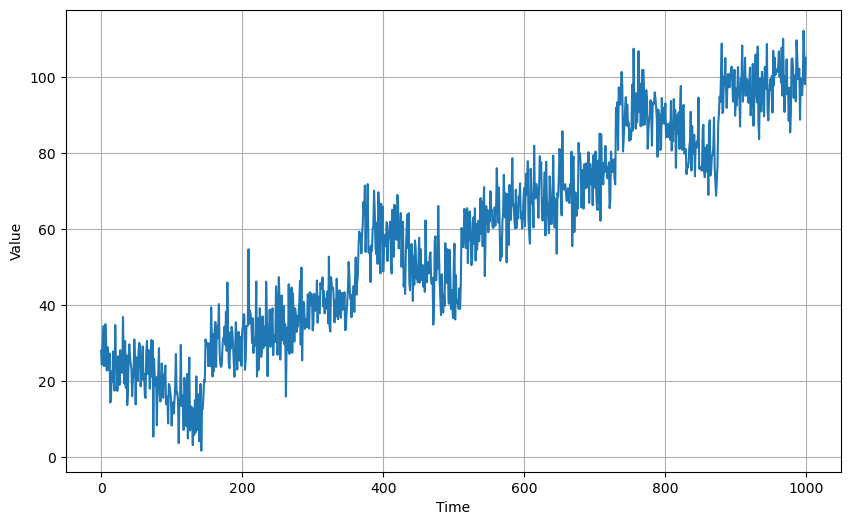

In [35]:
split_time = 1000

# 1 - 1000 training set
time_train = time[:split_time]
x_train = series[:split_time]

plt.figure(figsize=(10, 6))
plot_series(time_train, x_train)
plt.show()

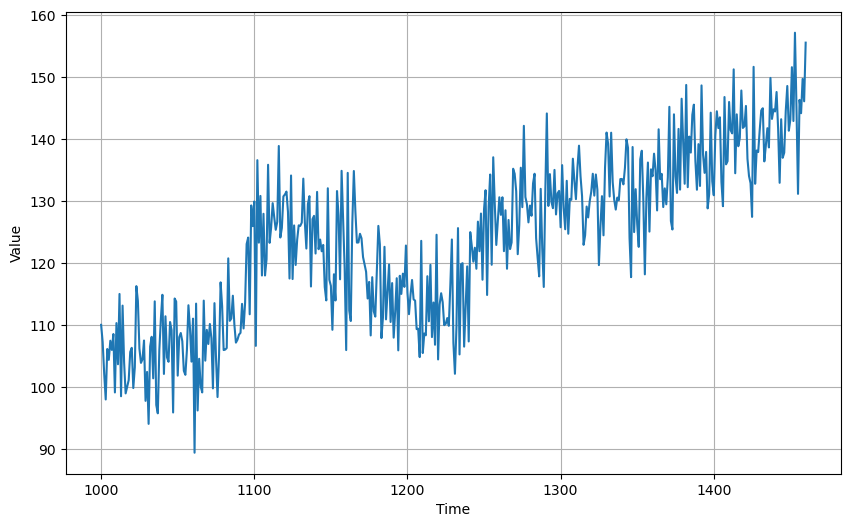

In [36]:
# 1000 + validation set
time_valid = time[split_time:]
x_valid = series[split_time:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plt.show()

In [44]:
# The most basic method to predict a time series is to say that the predicted value 
# at time t + 1 is the same as the value from time t, effectively shifting the time 
# series by a single period.

naive_forecast = series[split_time - 1:-1] 

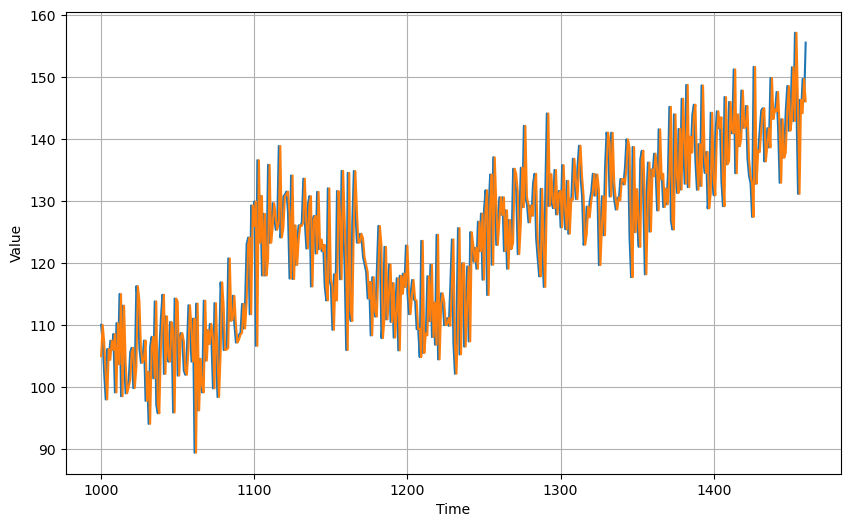

In [47]:
# Plotting the naive forcast with the original dataset

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, naive_forecast)

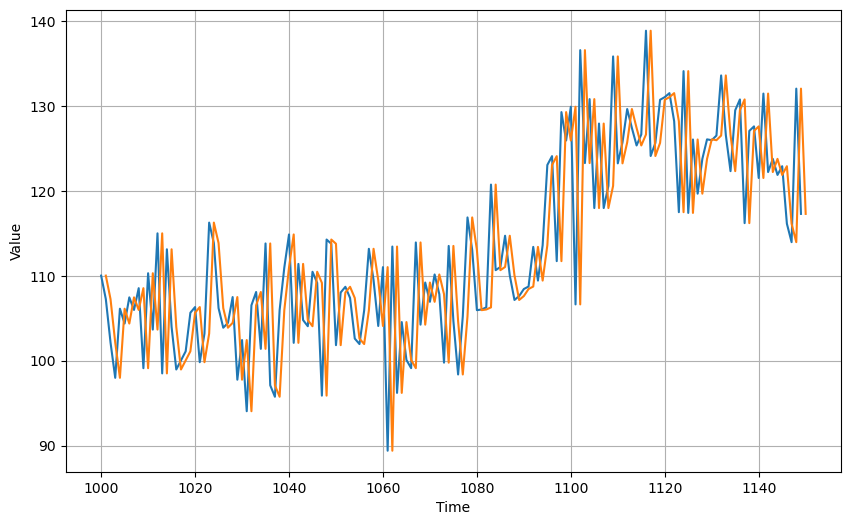

In [51]:
# Zooming into the above graph to see the difference in graphs

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, start=0, end=150)
plot_series(time_valid, naive_forecast, start=1, end=151)

Two ways to measure prediction accuracy:
* Mean squared error (MSE): difference between predicted value and actual value at time t, square it, average over all the values. 
- Mean absolute error (MAE): difference between predicted value and actual value at time t, take absolute value, average over all the values. 
    

In [53]:
print(keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy()) # MSE
print(keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy()) # MAE

76.474915
6.8992977


### Less Naive: Using Moving Average for Prediction

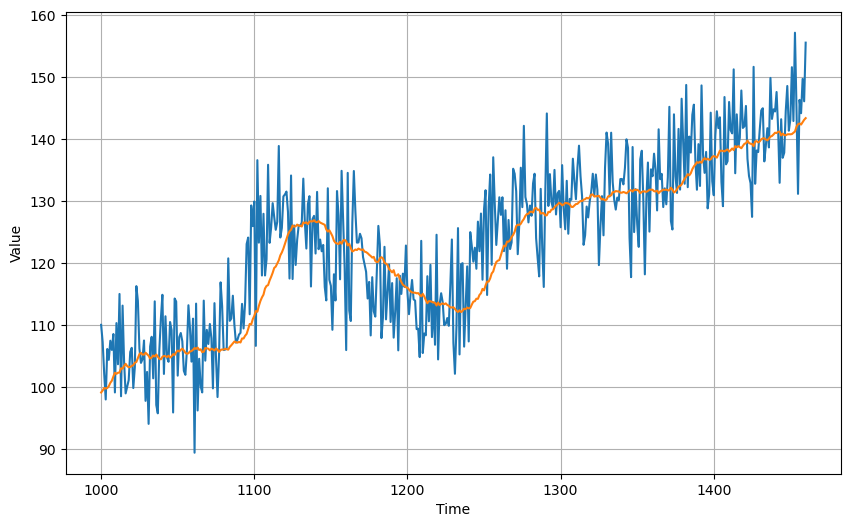

In [60]:
def moving_average_forecast(series, window_size): 
    """Forecasts the mean of the last few values. If window_size=1, then this is equivalent to naive forecast"""
    forecast = []
    for time in range(len(series) - window_size):
        forecast.append(series[time:time + window_size].mean()) 
    return np.array(forecast)
    
# this forcasts the mean of the last 30 values
moving_avg = moving_average_forecast(series, 30)[split_time - 30:]
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, moving_avg)

In [61]:
print(keras.metrics.mean_squared_error(x_valid, moving_avg).numpy())
print(keras.metrics.mean_absolute_error(x_valid, moving_avg).numpy())

49.044434
5.532835


The accuracy is better but this approach doesnt take into account the trend or seasonality.

In [63]:
diff_series = (series[365:] - series[:-365])
diff_time = time[365:]

In [75]:
diff_moving_avg = moving_average_forecast(diff_series, 50)[split_time - 365 - 50:]
diff_moving_avg_plus_smooth_past = moving_average_forecast(series[split_time - 370:-360], 10) + diff_moving_avg

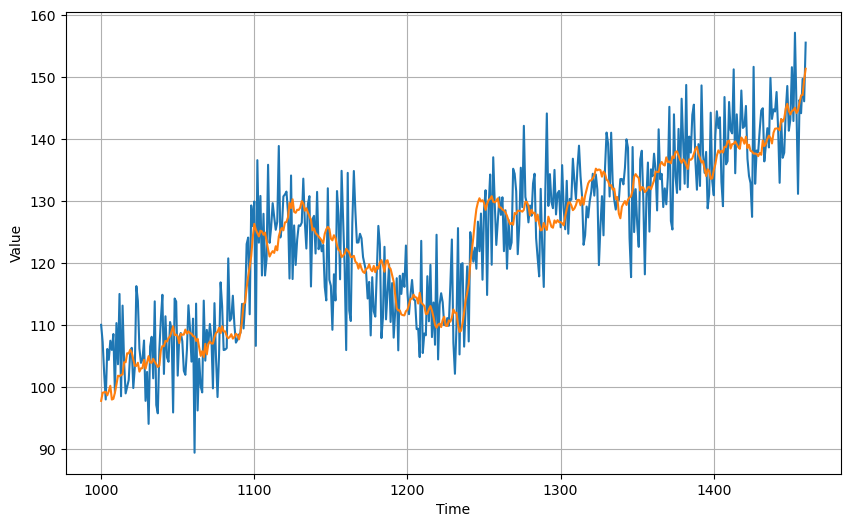

In [76]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_smooth_past)
plt.show()

In [78]:
print(keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())
print(keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())

40.902336
5.1360006


This approach gave the best accuracy values. 

## Chapter 10: ML Models to Predict Sequences

Creating a simple sequence with 'features' and a 'label'.

In [81]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True) 
dataset = dataset.flat_map(lambda window: window.batch(5))

for window in dataset: 
    print(window.numpy())

[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]
[5 6 7 8 9]


In [89]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True) 
dataset = dataset.flat_map(lambda window: window.batch(5)) 
dataset = dataset.map(lambda window: (window[:-1], window[-1:])) 

for x,y in dataset:
    print(x.numpy(), y.numpy())
    
# This creates a set of features (first part) and labels (second part).

[0 1 2 3] [4]
[1 2 3 4] [5]
[2 3 4 5] [6]
[3 4 5 6] [7]
[4 5 6 7] [8]
[5 6 7 8] [9]


In [90]:
# shuffling and batching
dataset = dataset.shuffle(buffer_size=10)
dataset = dataset.batch(2).prefetch(1)

In [91]:
for x,y in dataset:
    print("x = ", x.numpy())
    print("y = ", y.numpy())

x =  [[0 1 2 3]
 [1 2 3 4]]
y =  [[4]
 [5]]
x =  [[5 6 7 8]
 [4 5 6 7]]
y =  [[9]
 [8]]
x =  [[3 4 5 6]
 [2 3 4 5]]
y =  [[7]
 [6]]


### Creating a Windowed Version of the Time Series Dataset

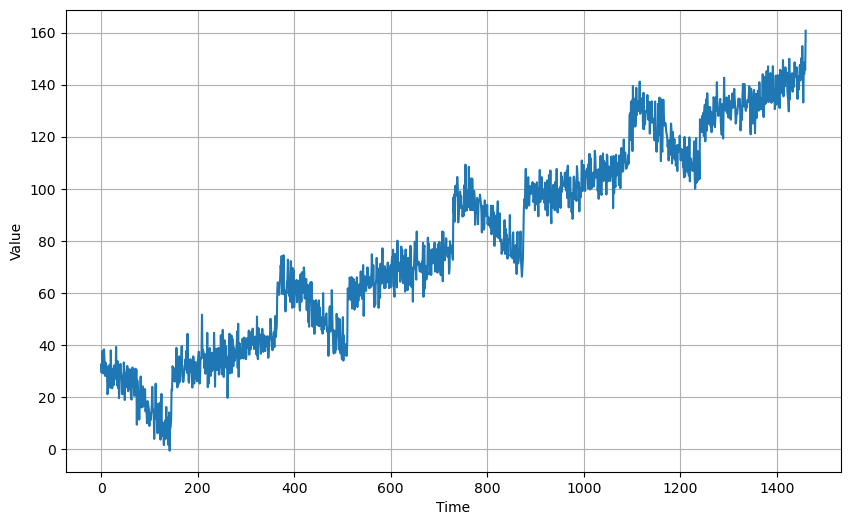

In [153]:
def trend(time, slope=0): 
    return slope * time

def seasonal_pattern(season_time): 
    return np.where(season_time < 0.4, np.cos(season_time * 2 * np.pi), 1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0): 
    season_time = ((time + phase) % period) / period 
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None): 
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
series = trend(time, 0.1)
baseline = 10
amplitude = 20
slope = 0.09
noise_level = 5

series = baseline + trend(time, slope)
series += seasonality(time, period=365, amplitude=amplitude)
series += noise(time, noise_level, seed=42)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

In [154]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True) 
    dataset = dataset.flat_map(lambda window:
                               window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1) 
    return dataset

In [155]:
split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]
window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [149]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

In [150]:
for x,y in dataset:
    print("x = ", x.numpy())
    print("y = ", y.numpy())

x =  [[ 62.952007   64.05696    58.283886   66.045906   54.593163   62.61853
   56.942356   59.787106   63.332462   58.842922   61.27206    68.27649
   60.411064   67.52481    57.74897    66.097984   70.708595   51.194626
   59.620773   66.54333  ]
 [ 28.964384   31.70668    30.526445   33.42535    44.65221    23.805752
   36.63676    25.205479   30.973211   38.841652   33.78254    28.13687
   30.013733   37.05311    30.068363   34.867767   34.078815   30.658636
   44.702236   37.21819  ]
 [ 14.199106   16.780426   23.947128   15.146604   15.320567   13.421374
    3.9623182  13.188054   13.388204   25.171759   11.6644125  13.906882
   12.000869    6.108772   17.446548   15.27501    15.256137    6.5424857
   17.89475     3.665866 ]
 [ 33.883587   26.522177   25.50652    33.326664   29.850613   34.591846
   33.442245   30.766418   26.951393   23.666212   29.063244   35.63347
   32.47788    25.234934   32.386024   33.50347    27.214636   32.459858
   32.03985    26.091793 ]
 [  9.942256  

In [151]:
dataset = windowed_dataset(series, window_size, 1, shuffle_buffer_size) 
for feature, label in dataset.take(1):
    print(feature) 
    print(label)

tf.Tensor(
[[23.119297  14.51153   16.129282  15.553032   9.942256  18.487074
  18.058874  16.526875  15.076769   8.922038  13.645741  13.786459
  11.240803  14.199106  16.780426  23.947128  15.146604  15.320567
  13.421374   3.9623182]], shape=(1, 20), dtype=float32)
tf.Tensor([13.188054], shape=(1,), dtype=float32)


In [152]:
# Creating a DNN to fit the data 
dataset = windowed_dataset(series, window_size, batch_size, shuffle_buffer_size)
model = tf.keras.models.Sequential(
    [tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"), # accepts the input shape of window_size
     tf.keras.layers.Dense(10, activation="relu"), # an output layer that will contain the predicted value.
     tf.keras.layers.Dense(1)])

In [138]:
model.compile(loss="mse",optimizer=tf.keras.optimizers.SGD(
    lr=1e-6,
    momentum=0.9))

# loss function here is MSE
# optimizer used here is stochastic gradient descent

In [139]:
model.fit(dataset,epochs=100,verbose=1)

Epoch 1/100
     12/Unknown - 0s 5ms/step - loss: 143.9400  

2023-02-08 18:10:54.796333: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


46/46 [==============================] - 0s 6ms/step - loss: 97.0632
Epoch 2/100
46/46 [==============================] - 0s 5ms/step - loss: 77.6778
Epoch 3/100
46/46 [==============================] - 0s 5ms/step - loss: 70.3199
Epoch 4/100
46/46 [==============================] - 0s 4ms/step - loss: 66.0109
Epoch 5/100
46/46 [==============================] - 0s 4ms/step - loss: 58.9319
Epoch 6/100
46/46 [==============================] - 0s 4ms/step - loss: 54.3687
Epoch 7/100
46/46 [==============================] - 0s 5ms/step - loss: 61.9218
Epoch 8/100
46/46 [==============================] - 0s 5ms/step - loss: 67.3927
Epoch 9/100
46/46 [==============================] - 0s 5ms/step - loss: 49.3837
Epoch 10/100
46/46 [==============================] - 0s 5ms/step - loss: 50.2078
Epoch 11/100
46/46 [==============================] - 0s 5ms/step - loss: 48.6120
Epoch 12/100
46/46 [==============================] - 0s 4ms/step - loss: 45.5045
Epoch 13/100
46/46 [=================

### Evaluating the Results of the DNN

In [140]:
print(series[1000:1020])

[109.170746 106.86935  102.61668   99.15634  105.95478  104.503876
 107.08533  105.858284 108.00339  100.15279  109.4894   103.96404
 113.426094  99.67773  111.87749  104.26137  100.08899  101.00105
 101.893265 105.69048 ]


In [141]:
print(series[1020])

106.258606


In [142]:
print(model.predict(series[1000:1020][np.newaxis]))

1/1 [==============================] - 0s 36ms/step
[[100.90126]]


2023-02-08 18:11:21.942708: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [143]:
forecast = []
for time in range(len(series) - window_size):
    forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step


In [157]:
forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]

IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

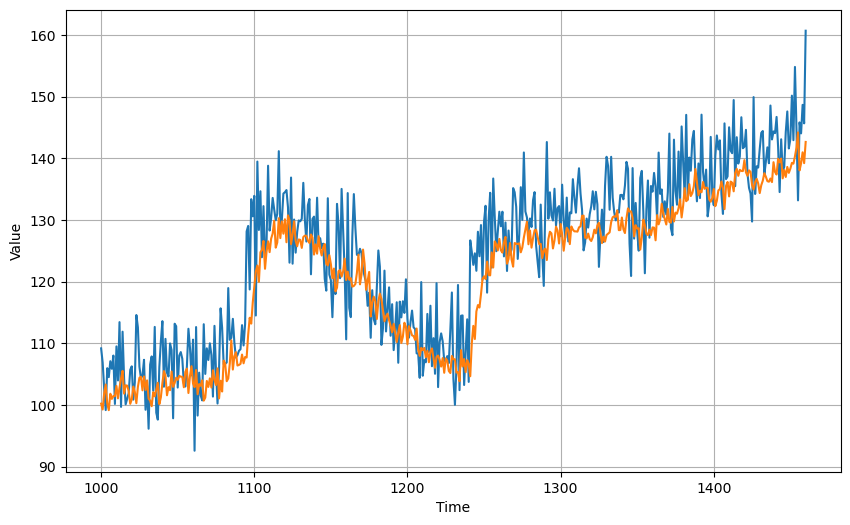

In [145]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, results)